In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\adamya sharma\Downloads\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# KMEANS

In [5]:
from sklearn.cluster import KMeans

In [6]:
x=pd.DataFrame(df.iloc[:,[5,6,7]])
x

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [9]:
x.columns=['math_score', 'reading_score', 'writing_score']
x

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
sse

[673318.6020000001,
 281953.57458240417,
 177450.25542956163,
 136370.9158450953,
 111305.39766860375,
 97419.28114247927,
 85748.6367450396,
 76543.88761977734,
 68449.49508621953]

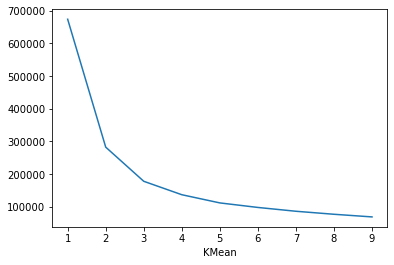

In [16]:
plt.xlabel('KMean')
plt.plot(k_range,sse)

In [17]:
y_pred= KMeans(n_clusters=3, random_state=1).fit_predict(x)
y_pred

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

In [18]:
km=KMeans(n_clusters=3)
km.fit(x)
km.labels_

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

Text(0.5, 1.0, 'KMEANS3')

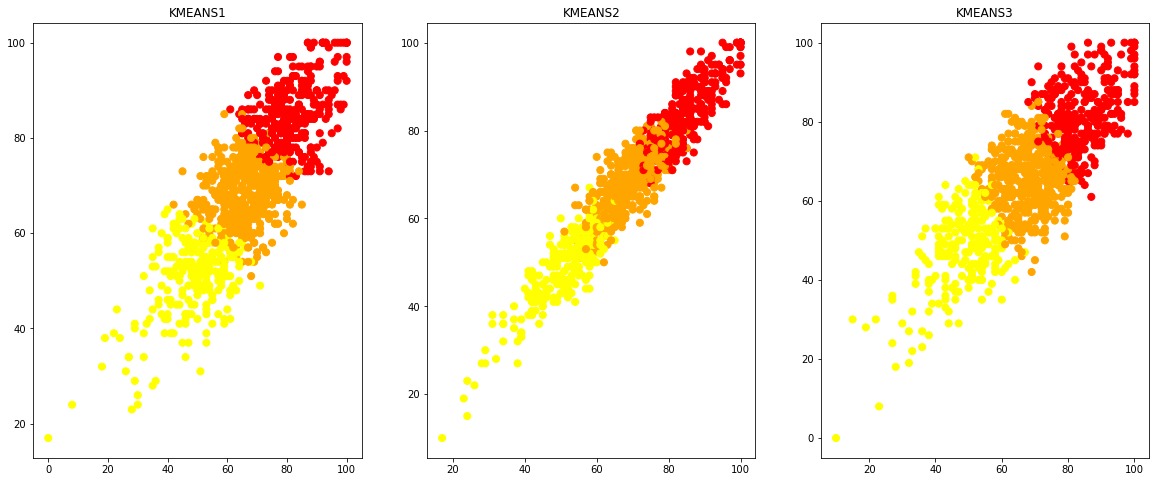

In [24]:
colormap=np.array(['orange', 'red', 'yellow'])
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.scatter(x.math_score,x.reading_score,c=colormap[y_pred],s=50)
plt.title('KMEANS1')
plt.subplot(1,3,2)
plt.scatter(x.reading_score,x.writing_score,c=colormap[y_pred],s=50)
plt.title('KMEANS2')
plt.subplot(1,3,3)
plt.scatter(x.writing_score,x.math_score,c=colormap[y_pred],s=50)
plt.title('KMEANS3')

# HIERARCHIAL CLUSTERING

In [27]:
x=df.iloc[:,[5,6,7]].values
x

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [28]:
import scipy.cluster.hierarchy as sch

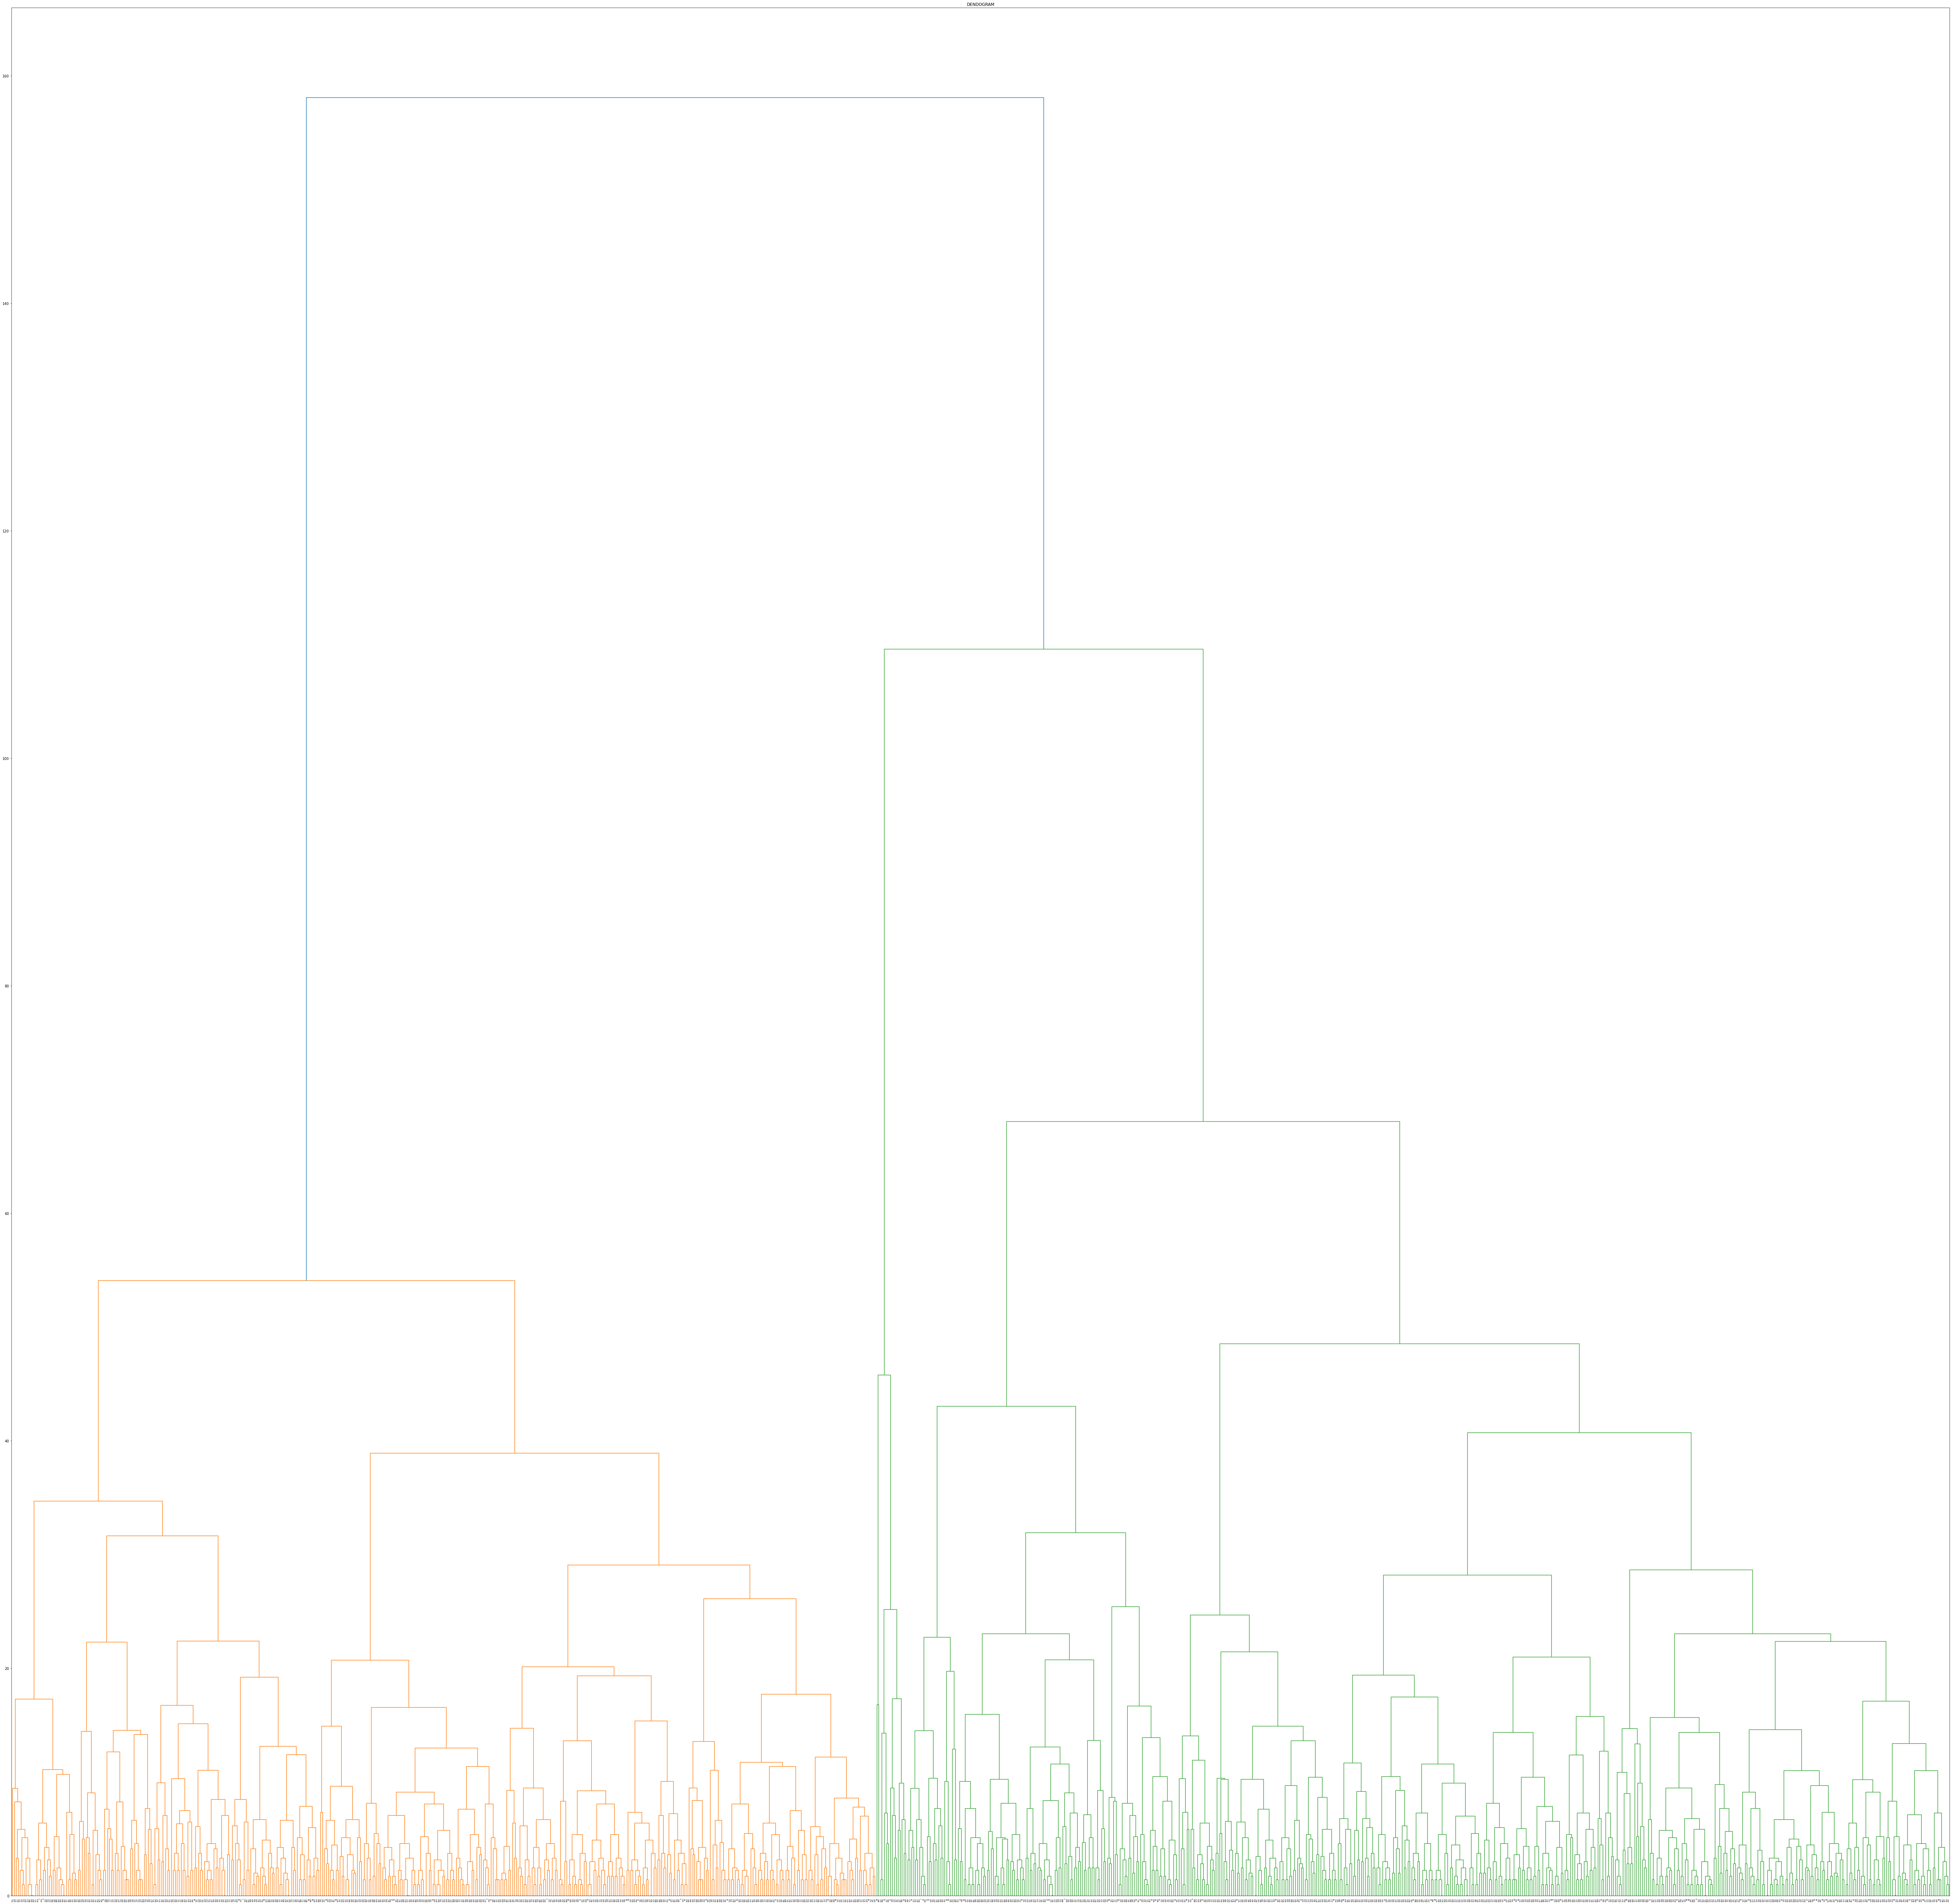

In [29]:
plt.figure(figsize=(100,100))
dendrogram=sch.dendrogram(sch.linkage(x,method='complete'))
plt.title('DENDOGRAM')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
ab=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [35]:
y_ab=ab.fit_predict(x)
y_ab

array([1, 3, 3, 2, 1, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 0, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 2, 3, 2, 2, 0, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1,
       1, 1, 1, 0, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 1, 1, 1,
       3, 2, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 3, 1, 1, 3, 1, 1, 1, 2,
       1, 3, 1, 1, 1, 1, 1, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 3, 3, 1, 2, 3,
       2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 3, 1, 3, 2, 1, 2,
       1, 3, 2, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1,

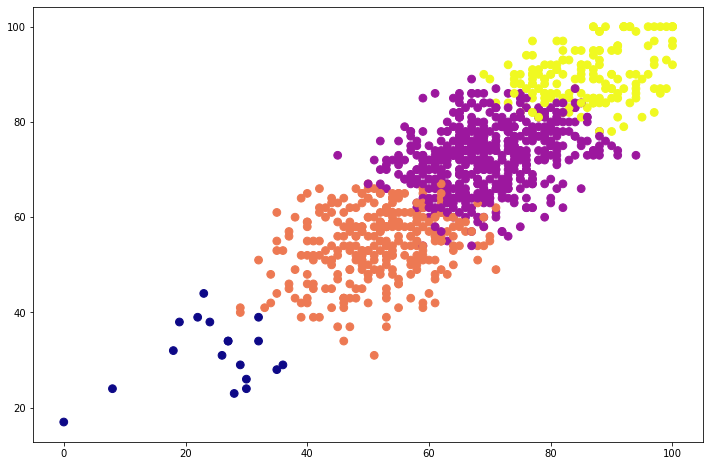

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(x[:,0],x[:, 1],c=y_ab, cmap='plasma',s=60)

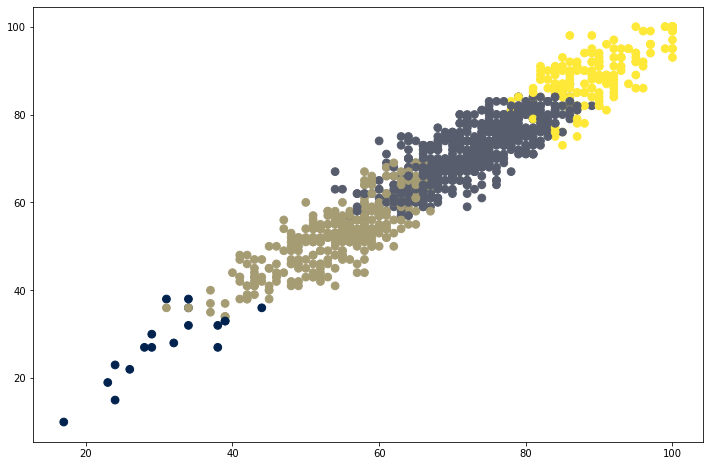

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(x[:,1],x[:, 2],c=y_ab, cmap='cividis',s=60)

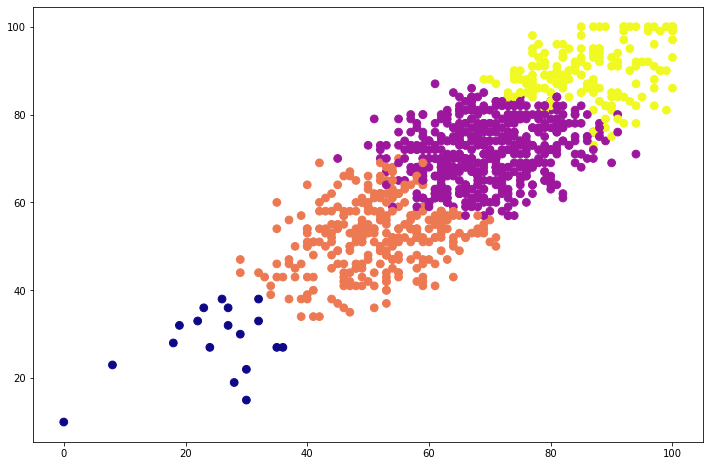

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(x[:,0],x[:, 2],c=y_ab, cmap='plasma',s=60)